In [691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
from scipy.stats import chi2_contingency
import re
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


In [692]:
dataDirectory = '../data/Listado_oficial_de_las_especies_silvestres_amenazadas_de_la_diversidad_biol_gica_colombiana_continental_y_marino_costera_-_Resoluci_n_0126_de_2024_20240525.csv'
data = pd.read_csv(dataDirectory)

In [693]:
data.head()

,IDENTIFICACION,IDENTIFICACION TAXONOMICA,NOMBRE CIENTIFICO,CLASIFICACION SUPERIOR,REINO,FILO,CLASE,ORDEN,FAMILIA,GENERO,EPITETO ESPECIFICO,EPITETO INFRAESPECIFICO,RANGO DE TAXON,NOMBRE CIENTIFICO 1,NOMBRE VERNACULO,CODIGO NOMENCLATURA,ESTADO TAXONOMICO,TAXON OBSERVACIONES,LENGUAJE,ESTADO DE AMENAZA
0,gbif.org/species/3548724,gbif.org/species/3548724,Arthonia obscurella,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Arthoniaceae,Arthonia,obscurella,NaN,Especie,Müll.Arg.,NaN,ICN,Aceptado,Nombre original validado: Arthonia obscurella ...,es,CR
1,gbif.org/species/3548779,gbif.org/species/3548779,Arthonia septemlocularis,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Arthoniaceae,Arthonia,septemlocularis,NaN,Especie,Müll.Arg.,NaN,ICN,Aceptado,Nombre original validado: Arthonia septemlocul...,es,CR
2,gbif.org/species/10800176,gbif.org/species/10800176,Ancistrosporella leucophila,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Roccellaceae,Ancistrosporella,leucophila,NaN,Especie,(Nyl.) Ertz,NaN,ICN,Aceptado,Nombre original validado: Ancistrosporella leu...,es,CR
3,gbif.org/species/10874088,gbif.org/species/10874088,Byssoloma permutans,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Lecanoromycetes,Lecanorales,Byssolomataceae,Byssoloma,permutans,NaN,Especie,(Nyl.) Lücking,NaN,ICN,Aceptado,Nombre original validado: Byssoloma permutans ...,es,CR
4,gbif.org/species/5516240,gbif.org/species/5516240,Lecanactis proximans,Fungi | Ascomycota | Arthoniomycetes | Arthoni...,Fungi,Ascomycota,Arthoniomycetes,Arthoniales,Roccellaceae,Lecanactis,proximans,NaN,Especie,(Nyl.) Zahlbr.,NaN,ICN,Aceptado,Nombre original validado: Lecanactis proximans...,es,CR


In [694]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   IDENTIFICACION             2103 non-null   object
 1   IDENTIFICACION TAXONOMICA  2103 non-null   object
 2   NOMBRE CIENTIFICO          2103 non-null   object
 3   CLASIFICACION SUPERIOR     2103 non-null   object
 4   REINO                      2103 non-null   object
 5   FILO                       2103 non-null   object
 6   CLASE                      2103 non-null   object
 7   ORDEN                      2103 non-null   object
 8   FAMILIA                    2103 non-null   object
 9   GENERO                     2103 non-null   object
 10  EPITETO ESPECIFICO         2103 non-null   object
 11  EPITETO INFRAESPECIFICO    34 non-null     object
 12  RANGO DE TAXON             2103 non-null   object
 13  NOMBRE CIENTIFICO 1        2088 non-null   object
 14  NOMBRE V

In [695]:
print(data.isnull().sum())

# Rellenar los valores nulos de 'NOMBRE VERNACULO' con 'Desconocido'
data['NOMBRE VERNACULO'] = data['NOMBRE VERNACULO'].fillna('Desconocido')

# Eliminar columnas con muchos valores nulos o irrelevantes para el análisis
data_cleaned = data.drop(['EPITETO INFRAESPECIFICO', 'NOMBRE CIENTIFICO 1'], axis=1)

# Convertir a categoría las columnas relevantes
for col in ['REINO', 'FILO', 'CLASE', 'ORDEN', 'FAMILIA', 'GENERO', 'ESTADO DE AMENAZA']:
    data_cleaned[col] = data_cleaned[col].astype('category')

print(data_cleaned.info())


IDENTIFICACION                  0
IDENTIFICACION TAXONOMICA       0
NOMBRE CIENTIFICO               0
CLASIFICACION SUPERIOR          0
REINO                           0
FILO                            0
CLASE                           0
ORDEN                           0
FAMILIA                         0
GENERO                          0
EPITETO ESPECIFICO              0
EPITETO INFRAESPECIFICO      2069
RANGO DE TAXON                  0
NOMBRE CIENTIFICO 1            15
NOMBRE VERNACULO             1236
CODIGO NOMENCLATURA             0
ESTADO TAXONOMICO               0
TAXON OBSERVACIONES             0
LENGUAJE                        0
ESTADO DE AMENAZA               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103 entries, 0 to 2102
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   IDENTIFICACION             2103 non-null   object  
 1   IDENTIFICACION TAXONOMIC

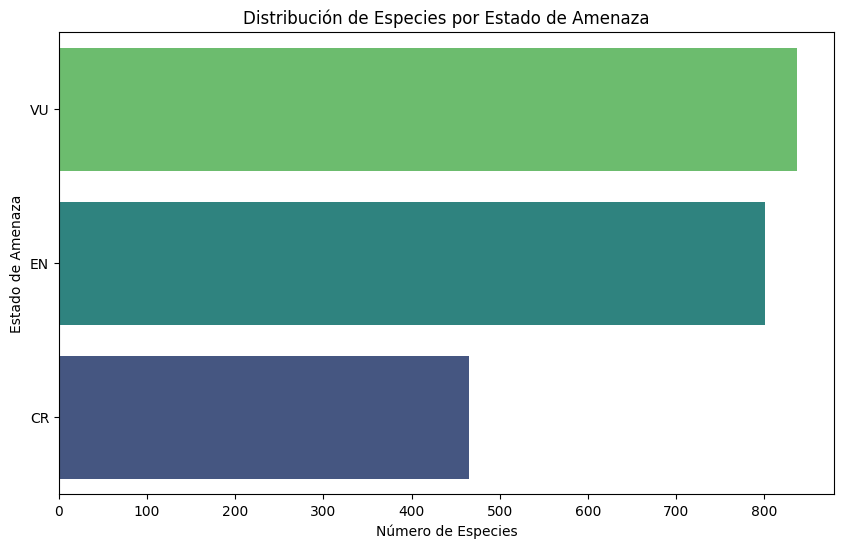

In [696]:
plt.figure(figsize=(10, 6))
sns.countplot(y='ESTADO DE AMENAZA', data=data_cleaned, order=data_cleaned['ESTADO DE AMENAZA'].value_counts().index, hue='ESTADO DE AMENAZA', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de Especies por Estado de Amenaza')
plt.xlabel('Número de Especies')
plt.ylabel('Estado de Amenaza')
plt.show()


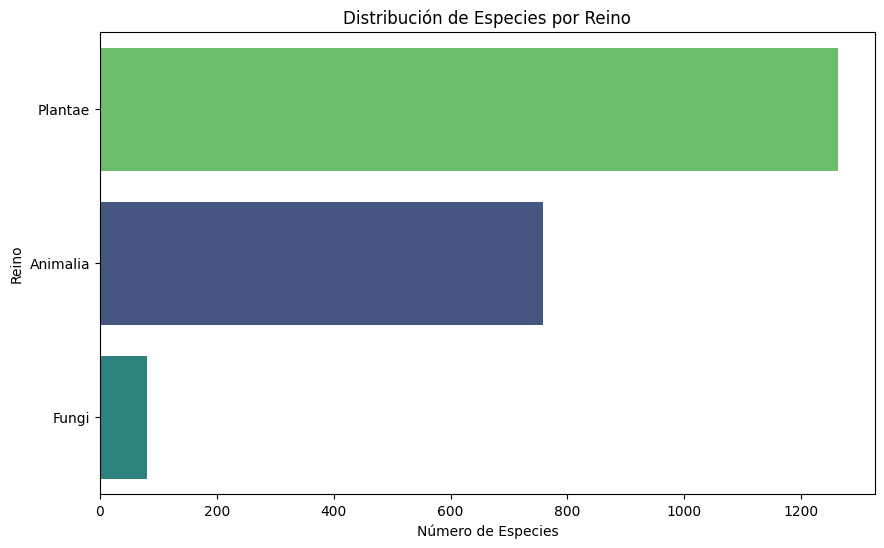

In [697]:
# Distribución de especies por reino
plt.figure(figsize=(10, 6))
sns.countplot(y='REINO', data=data_cleaned, order=data_cleaned['REINO'].value_counts().index, hue='REINO', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de Especies por Reino')
plt.xlabel('Número de Especies')
plt.ylabel('Reino')
plt.show()


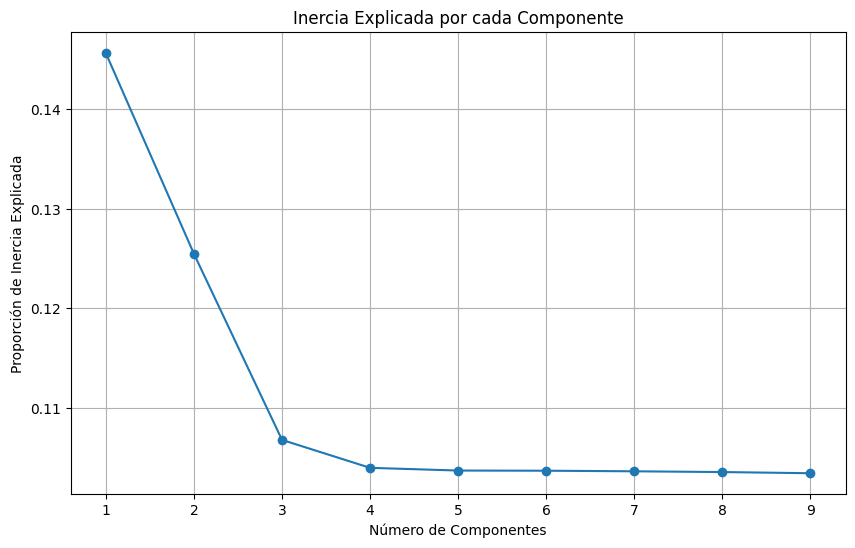

Inercia Acumulada: 0    0.145646
1    0.271134
2    0.377930
3    0.481922
4    0.585640
5    0.689341
6    0.792984
7    0.896551
8    1.000000
dtype: float64


In [698]:
# Columnas categóricas
categorical_columns = ['REINO', 'FILO', 'CLASE', 'ORDEN', 'FAMILIA', 'GENERO', 'ESTADO DE AMENAZA', 'RANGO DE TAXON', 'ESTADO TAXONOMICO']
data_categorical = data_cleaned[categorical_columns]

# Crear el objeto MCA y ajustar el modelo
mca = prince.MCA(n_components=len(categorical_columns), random_state=42)
mca = mca.fit(data_categorical)

# Obtener las coordenadas principales
coordinates = mca.transform(data_categorical)

# Calcular la inercia explicada
explained_inertia = (coordinates ** 2).sum(axis=0) / (coordinates ** 2).sum().sum()

# Graficar la inercia explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_inertia) + 1), explained_inertia, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Inercia Explicada')
plt.title('Inercia Explicada por cada Componente')
plt.grid()
plt.show()

# Mostrar la inercia acumulada
cumulative_inertia = explained_inertia.cumsum()
print("Inercia Acumulada:", cumulative_inertia)

In [727]:
loadings = mca.column_coordinates(data_categorical)

In [728]:
print("Cargas factoriales de las variables en cada dimensión:")
print(loadings)

Cargas factoriales de las variables en cada dimensión:
                                   0         1         2
REINO_Animalia             -0.695265  1.133039 -0.002181
REINO_Fungi                 4.593815  1.943971 -0.057081
REINO_Plantae               0.123204 -0.805572  0.004971
FILO_Arthropoda            -0.734267  1.091987 -3.441734
FILO_Ascomycota             4.623620  1.969502  1.187784
...                              ...       ...       ...
RANGO DE TAXON_Variedad     0.070703 -0.775443 -0.103542
ESTADO TAXONOMICO_Aceptado  0.397104 -0.637718 -0.003365
ESTADO TAXONOMICO_Dudoso   -0.685197  1.121501  2.325330
ESTADO TAXONOMICO_Sinónimo  0.203059 -0.668470  0.178331
ESTADO TAXONOMICO_Válido   -0.695421  1.133046 -0.005734

[1236 rows x 3 columns]


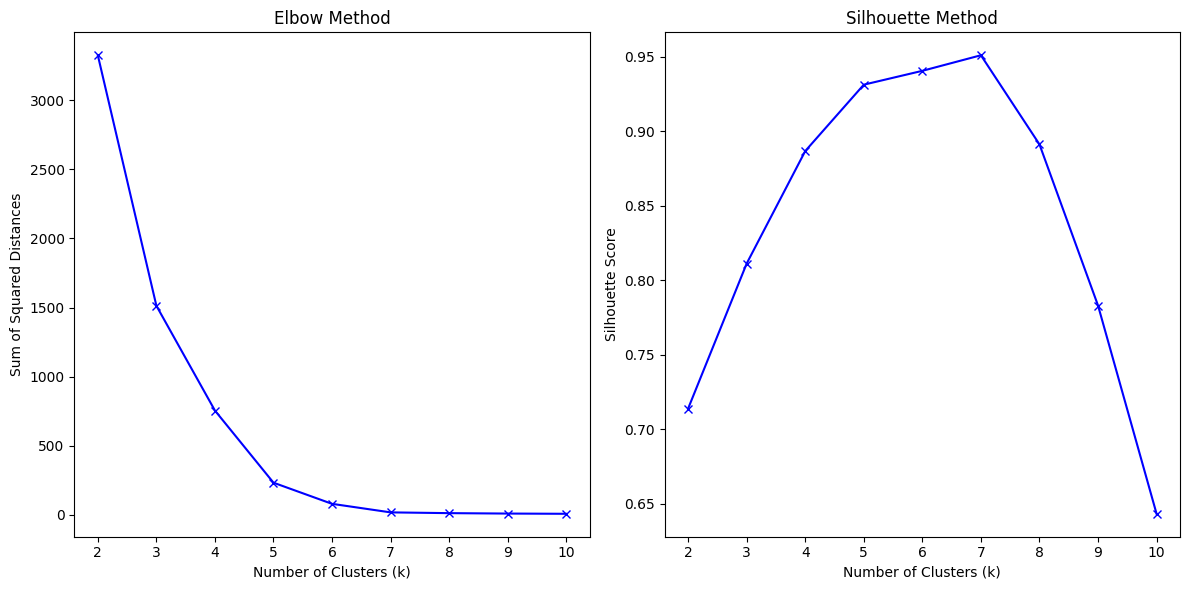

In [699]:
optimal_components = 3
mca = prince.MCA(n_components=optimal_components, random_state=42)
mca_results = mca.fit_transform(data_cleaned.select_dtypes(['category']))

# Añadir los resultados al DataFrame
df_mca = data_cleaned.copy()
df_mca['MCA1'] = mca_results.iloc[:, 0]
df_mca['MCA2'] = mca_results.iloc[:, 1]
df_mca['MCA3'] = mca_results.iloc[:, 2]
#--------------------------------------------------------------

#----------------------------
# Definir un rango de valores de k
k_values = range(2, 11)
elbow_scores = []
silhouette_scores = []

# Calcular la puntuación para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mca_results)
    elbow_scores.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center
    silhouette_scores.append(silhouette_score(mca_results, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, elbow_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

# Plot Silhouette Method
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

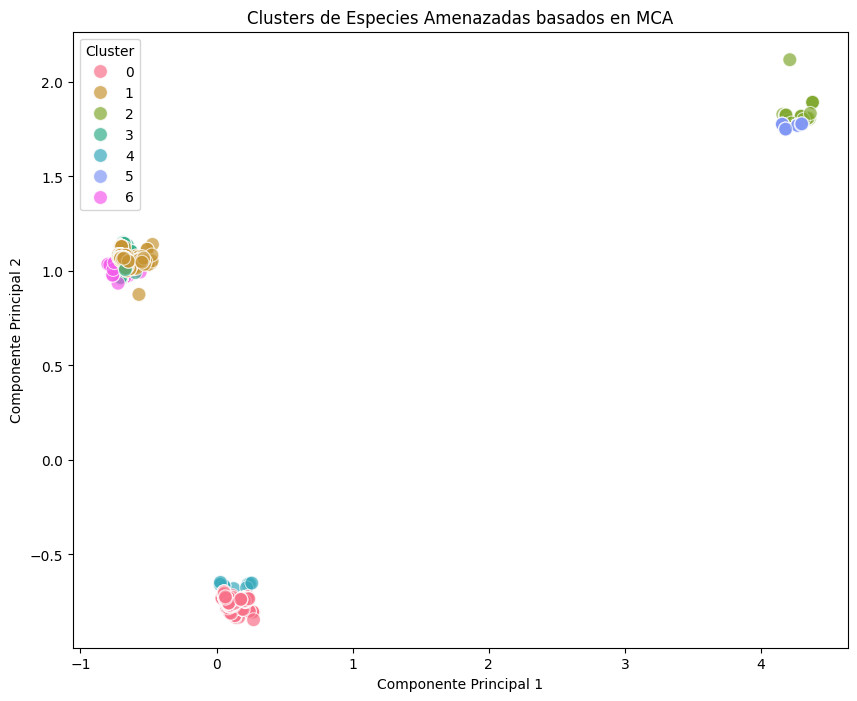

In [718]:
kmeans = KMeans(n_clusters=7, random_state=42)
df_mca['Cluster'] = kmeans.fit_predict(mca_results)

# Define la paleta de colores adecuada para personas con daltonismo
palette = sns.color_palette("husl", n_colors=7)  # Puedes ajustar el número de colores según el número de clusters

# Visualización de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MCA1', y='MCA2', hue='Cluster', data=df_mca, palette=palette, s=100, alpha=0.7)
plt.title('Clusters de Especies Amenazadas basados en MCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

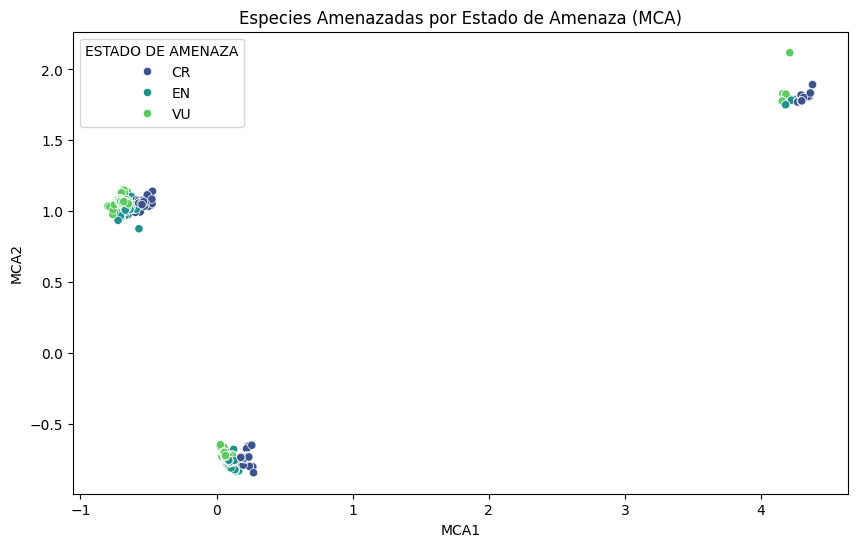

In [701]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mca, x='MCA1', y='MCA2', hue='ESTADO DE AMENAZA', palette='viridis')
plt.title('Especies Amenazadas por Estado de Amenaza (MCA)')
plt.show()

In [702]:
df_mca.to_csv('../output/mca_clusters.csv', index=False)

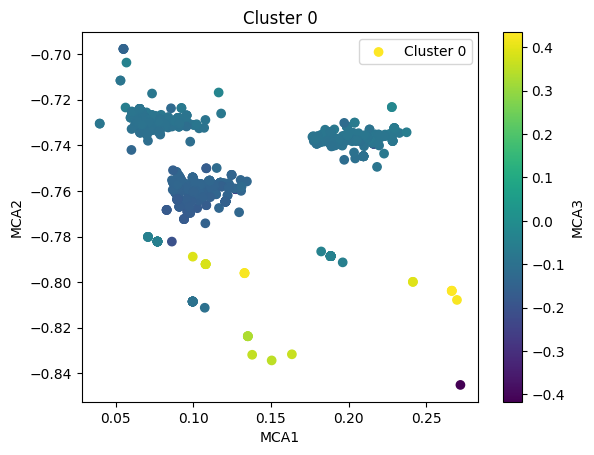

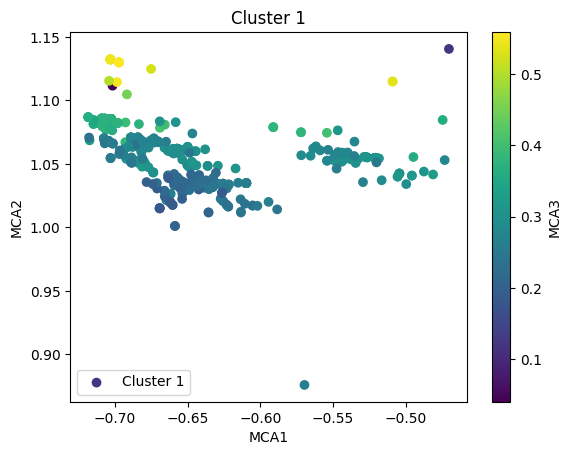

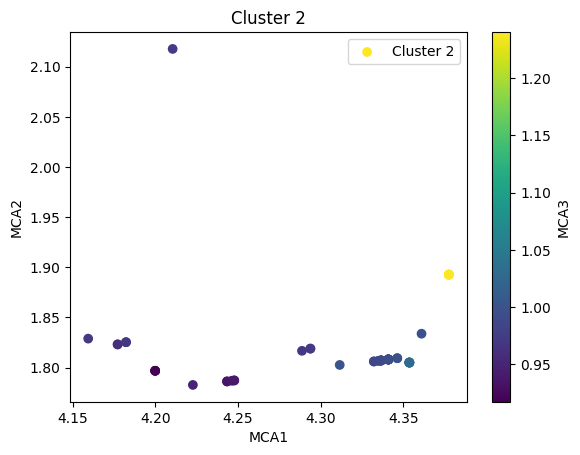

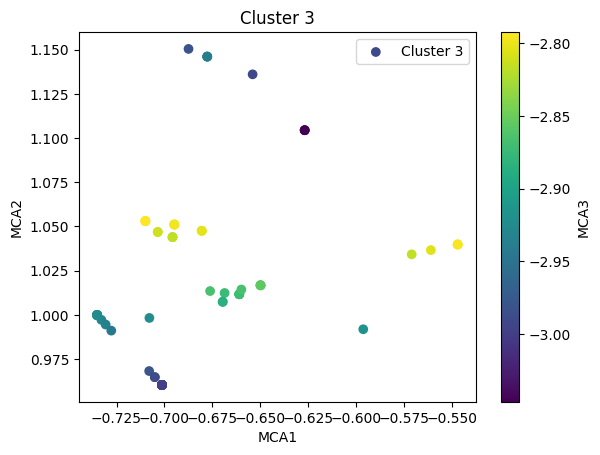

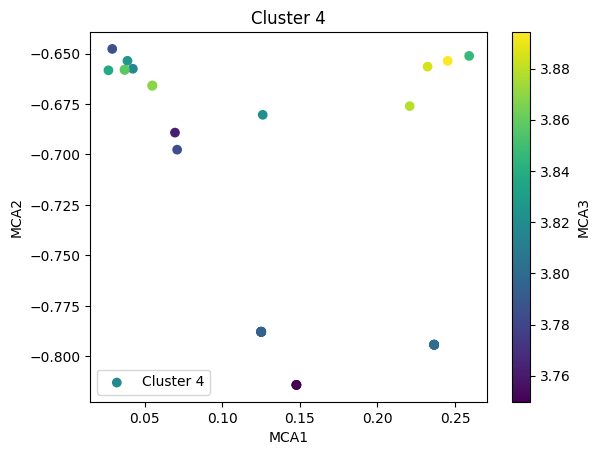

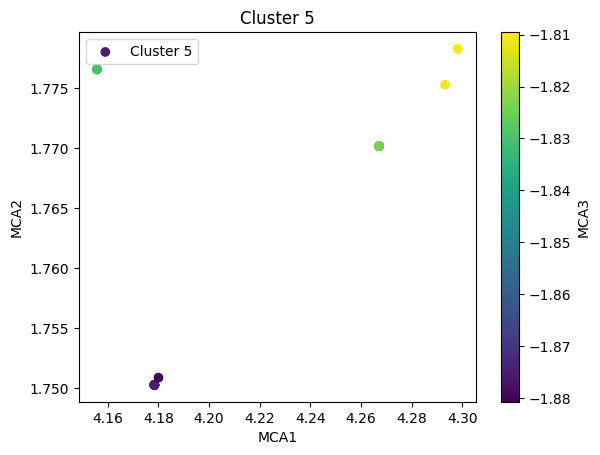

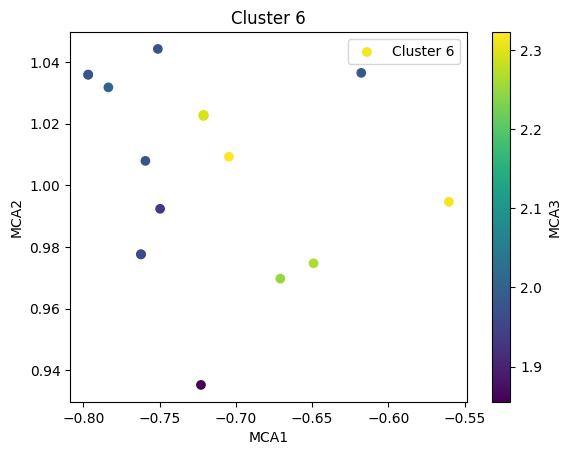

In [725]:
# Cargar los datos
data = pd.read_csv('../output/mca_clusters.csv')

# Agrupar los datos por cluster
clusters = data.groupby('Cluster')

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = clusters.agg({
    'MCA1': ['mean', 'median', 'std', 'min', 'max'],
    'MCA2': ['mean', 'median', 'std', 'min', 'max'],
    'MCA3': ['mean', 'median', 'std', 'min', 'max']
})

# Agrupar los datos por cluster
clusters = data.groupby('Cluster')

# Visualizar los resultados
for cluster, group in clusters:
    plt.figure()
    plt.title('Cluster {}'.format(cluster))
    plt.scatter(group['MCA1'], group['MCA2'], c=group['MCA3'], cmap='viridis', label='Cluster {}'.format(cluster))
    plt.xlabel('MCA1')
    plt.ylabel('MCA2')
    plt.colorbar(label='MCA3')
    plt.legend()
    plt.show()

In [736]:
clusters = data.groupby('Cluster')

# Calcular estadísticas descriptivas para cada cluster
cluster_stats = clusters.agg({
    'MCA1': 'mean',
    'MCA2': 'mean',
    'MCA3': 'mean'
})

# Imprimir los promedios de MCA para cada cluster
print("Promedios de MCA para cada cluster:")
print(cluster_stats)

Promedios de MCA para cada cluster:
             MCA1      MCA2      MCA3
Cluster                              
0        0.113900 -0.746442 -0.104347
1       -0.640496  1.055067  0.290167
2        4.303149  1.821322  1.005216
3       -0.683287  1.014228 -2.913494
4        0.139853 -0.738551  3.811091
5        4.228671  1.765791 -1.838900
6       -0.720752  1.007197  2.116817


## Cluster Analysis

- **Cluster 0:** Tiene valores negativos en MCA2, sugiriendo que este cluster está menos influenciado por las variabilidades capturadas por el segundo componente.
- **Cluster 1:** Valores positivos altos en MCA2 y MCA3, lo que indica influencias significativas de estas variabilidades.
- **Cluster 2:** Valores muy altos en MCA1 y MCA2, indicando que este cluster está muy influenciado por las variabilidades capturadas por estos dos componentes.
- **Cluster 3:** Valor negativo alto en MCA3, sugiriendo que este cluster está influenciado negativamente por la variabilidad capturada en el tercer componente.
- **Cluster 4:** Valor alto en MCA3, indicando una influencia significativa de la variabilidad capturada en el tercer componente.
- **Cluster 5:** Valores altos en MCA1 y MCA2, pero negativos en MCA3, mostrando una influencia dual pero opuesta de estas variabilidades.
- **Cluster 6:** Valores altos en MCA3, lo que indica una influencia significativa de la variabilidad capturada en este componente.

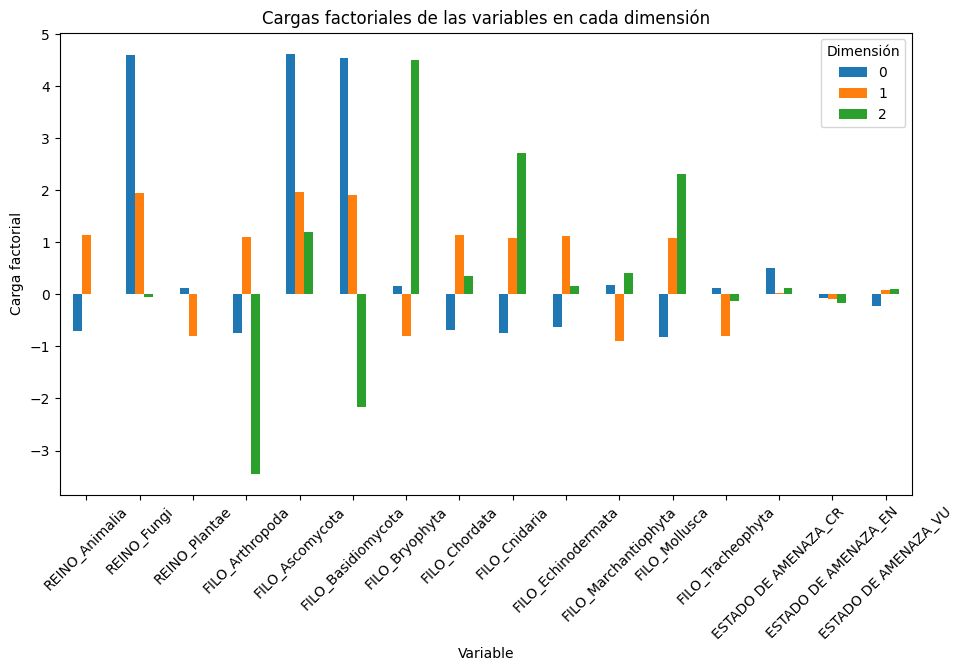

In [742]:

filtered_loadings_df = loadings[loadings.index.str.startswith(('REINO', 'ESTADO DE AMENAZA', 'FILO'))]

filtered_loadings_df.plot(kind='bar', figsize=(11, 6))
plt.title('Cargas factoriales de las variables en cada dimensión')
plt.xlabel('Variable')
plt.ylabel('Carga factorial')
plt.xticks(rotation=45)
plt.legend(title='Dimensión')
plt.show()